In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
# plt.style.use('../../style.mplstyle')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.size'] = 18

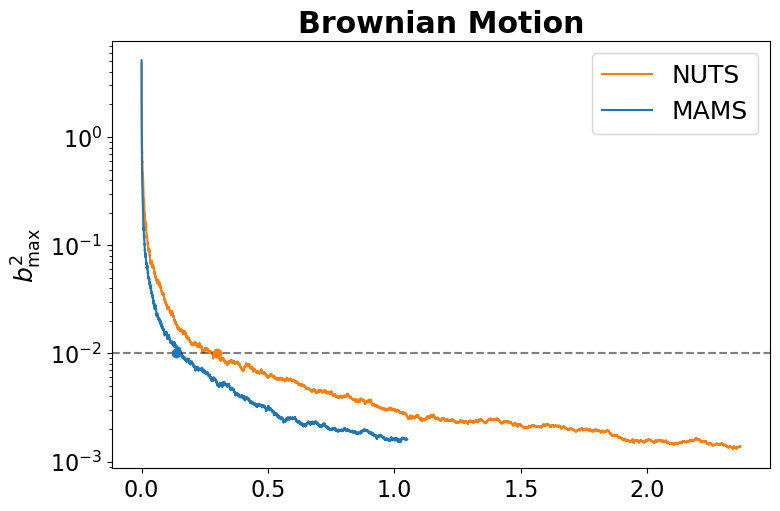

In [4]:
models= [('vector_brownian_motion_unknown_scales_missing_middle_observations', 'Brownian Motion', 29816, 13528),
        #  ('vector_german_credit_numeric_sparse_logistic_regression', 'German Credit', 88975, 55748 ),
        #  ('vector_synthetic_item_response_theory', 'Item Response Theory', 76043, 45371),
        #  ('Stochastic_Volatility_MAMS_Paper', 'Stochastic Volatility', 843768, 430088),
         ]

plt.figure(figsize = (15, 10))


for i, model in enumerate(models):

    plt.subplot(2, 2, i + 1)
    name, pretty_name, paper_results_nuts, paper_results_mams = model

    data = np.load('img/' + name + '.npz')
    y = data['nuts']
    x = np.arange(len(y)) * data['nuts_per_sample'] / 1e5
    plt.plot(x, y, label='NUTS', color= 'tab:orange')
    y = data['mams']
    x = np.arange(len(y)) * data['mams_per_sample'] / 1e5
    plt.plot(x, y, label='MAMS', color= 'tab:blue')
    # make horizontal line at 0.01
    plt.axhline(y=0.01, color='black', linestyle='--', alpha= 0.5)
    plt.plot([paper_results_nuts/1e5,], [0.01,], 'o', color = 'tab:orange')
    plt.plot([paper_results_mams/1e5,], [0.01,], 'o', color = 'tab:blue')
    if i // 2 != 0:
        plt.xlabel(r'# samples / $10^5$')
    if i % 2 == 0:
        plt.ylabel(r'$b^2_{\mathrm{max}}$')
    #plt.xscale('log')
    plt.yscale('log')
    plt.title(pretty_name, fontweight = 'bold')
    plt.legend()
    #plt.xlim(1e2, 5000)
plt.tight_layout()
plt.show()

#plt.savefig('papers/MAMS/img/' + model.name + '.png')
#plt.close()